In [1]:
# Import the function from the path_setup module
from path_setup import add_project_root_to_path

# Call the function to add the project root to the Python path
add_project_root_to_path()

Project root added to sys.path


In [6]:
from pipeline.utils.path_manager import PathManager
from pipeline.utils.data_analysis_utils import sorting_key, load_monitoring_pipeline_results
from pipeline.utils.visualization import analyze_activity_changes, plot_average_activity, heatmap_average_activity

path_manager = PathManager()

path_to_config_files = path_manager.path_to_config_files
path_to_piglet_rearing_info = path_manager.path_to_piglet_rearing_info
path_to_pipeline_outputs = path_manager.path_to_monitoring_pipeline_outputs
path_to_result_data_aggregations = path_manager.path_to_pipeline_results_aggregations

## Approach


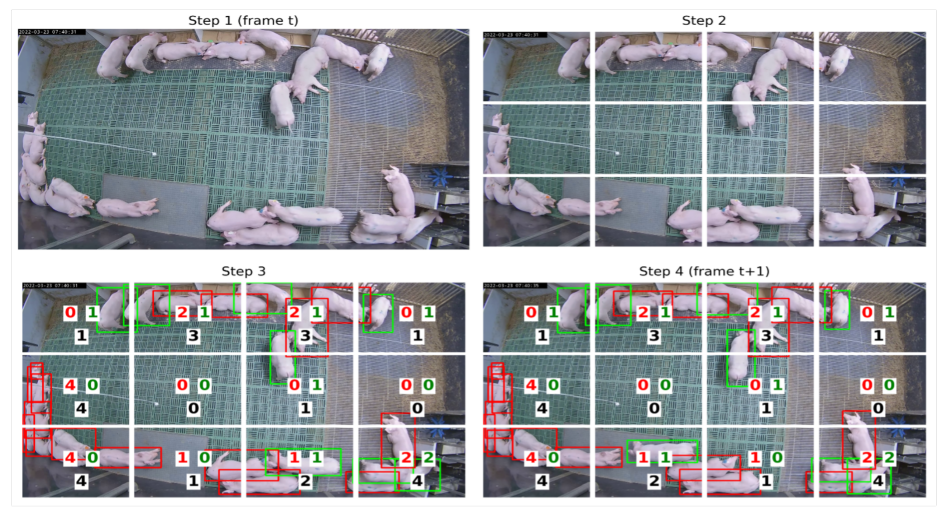

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_to_activity_derivation_example = os.path.join(path_manager.root_dir, "assets/figures/activity_derivation_example.png")
img = mpimg.imread(path_to_activity_derivation_example)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

- **Input Frame (Step 1):** This displays the frame captured at timestamp `t` in a sequence.
- **Sector Division (Step 2):** The image is segmented into a 3 × 4 grid, dividing it into 12 distinct sectors. While the grid's dimensions can be modified to suit various configurations, this specific size was chosen based on its performance with the applied video data.
- **Model Pipeline Output Assignment (Step 3):** The Intersection over Union (IoU) between predicted bounding boxes (BBs) and the sectors guides the allocation. Each BB is linked to the sector it overlaps with the most, eliminating redundancy from BBs overlapping multiple sectors. For clarity, each sector's center displays the total pig count and the count of lying vs. not lying pigs, color-coded in black, red, and green respectively. The outcome of this stage sets the baseline for subsequent activity derivation.
- **Activity Derivation (Step 4):** The process from Steps 1-3 is reiterated for the subsequent frame at timestamp `t+1`. The distribution of pigs and their postures from timestamp `t` is juxtaposed against `t+1`. For instance, in the depicted Step 4, the lower row's middle sectors experienced alterations in object counts. Sectors with changes update their counts, while unchanged sectors remain consistent. The discrepancy between sector counts from `t` and `t+1` quantifies activity and movement. This difference, denoted as `d`, aggregates changes across sectors. The final activity score for frames `t` and `t+1` is computed by multiplying `d` with the ratio of not lying to lying pigs. This nuanced calculation effectively differentiates high motion sequences from those with medium or low motion. The process is repeated for all sequence frames.


### Data Exploration


In [4]:
# load data
pipeline_monitoring_results = load_monitoring_pipeline_results(
    path_to_pipeline_outputs, path_to_config_files)

# Sort the monitoring_results by pen number and then by start date
pipeline_monitoring_results.sort(key=sorting_key)

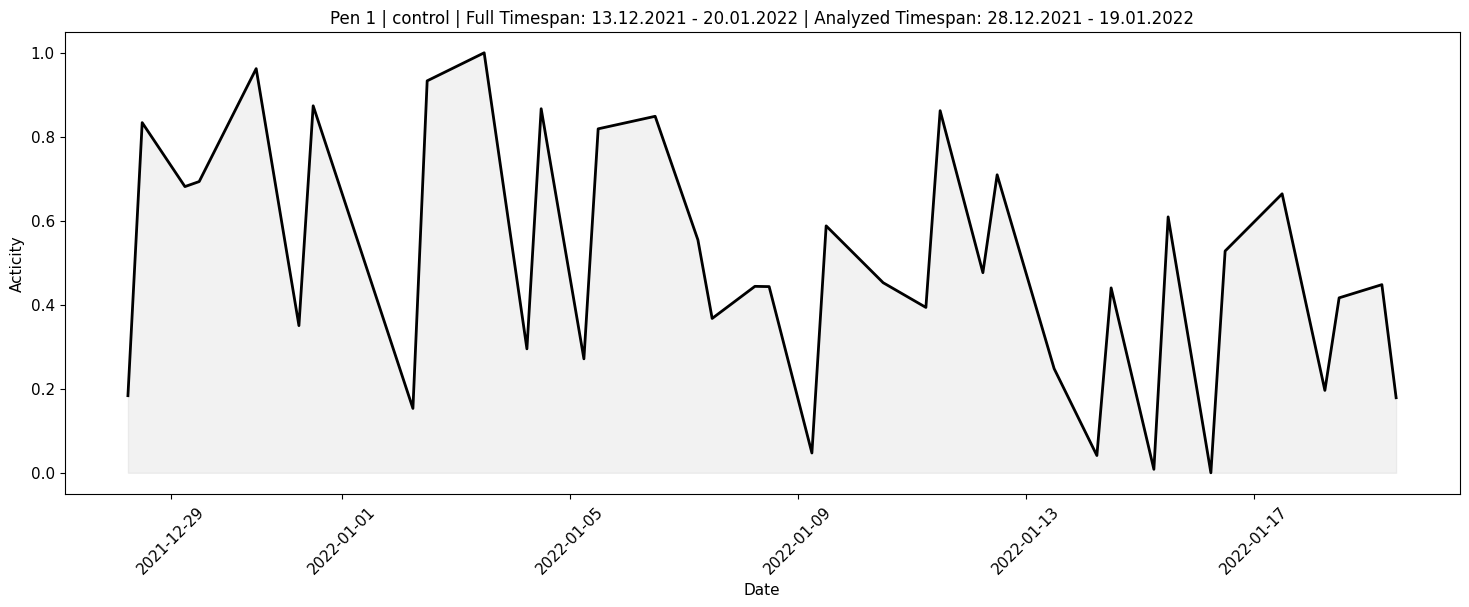

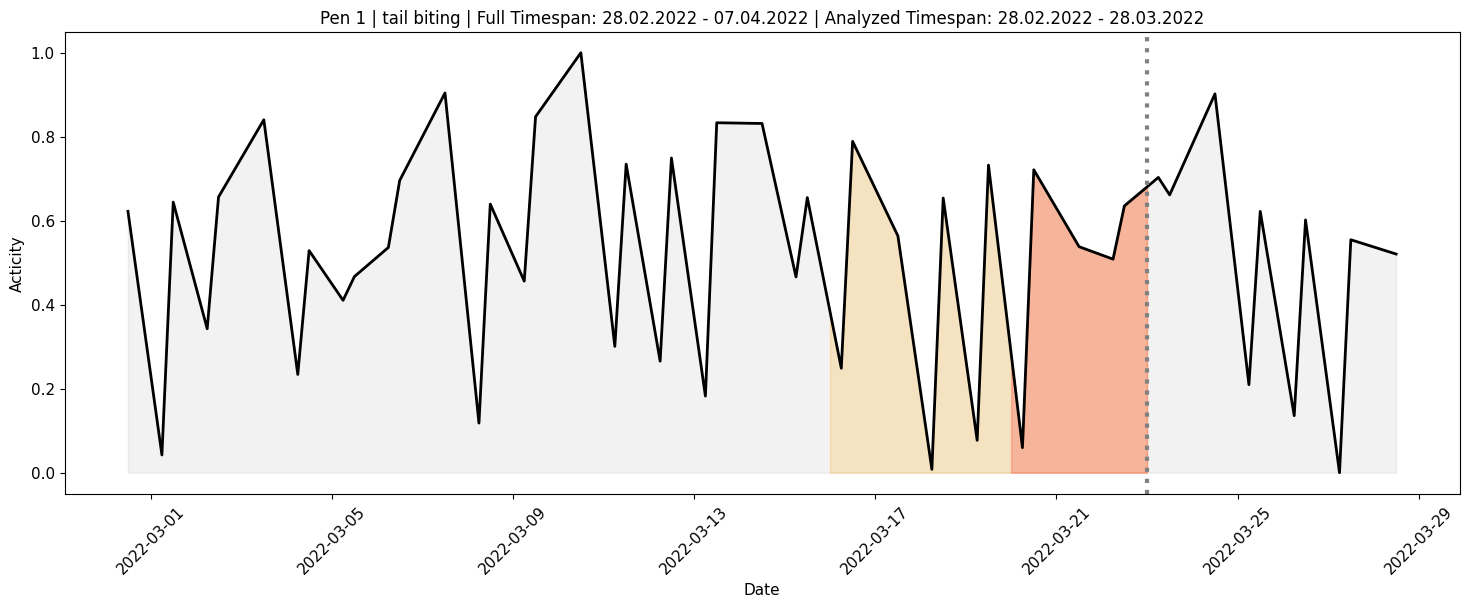

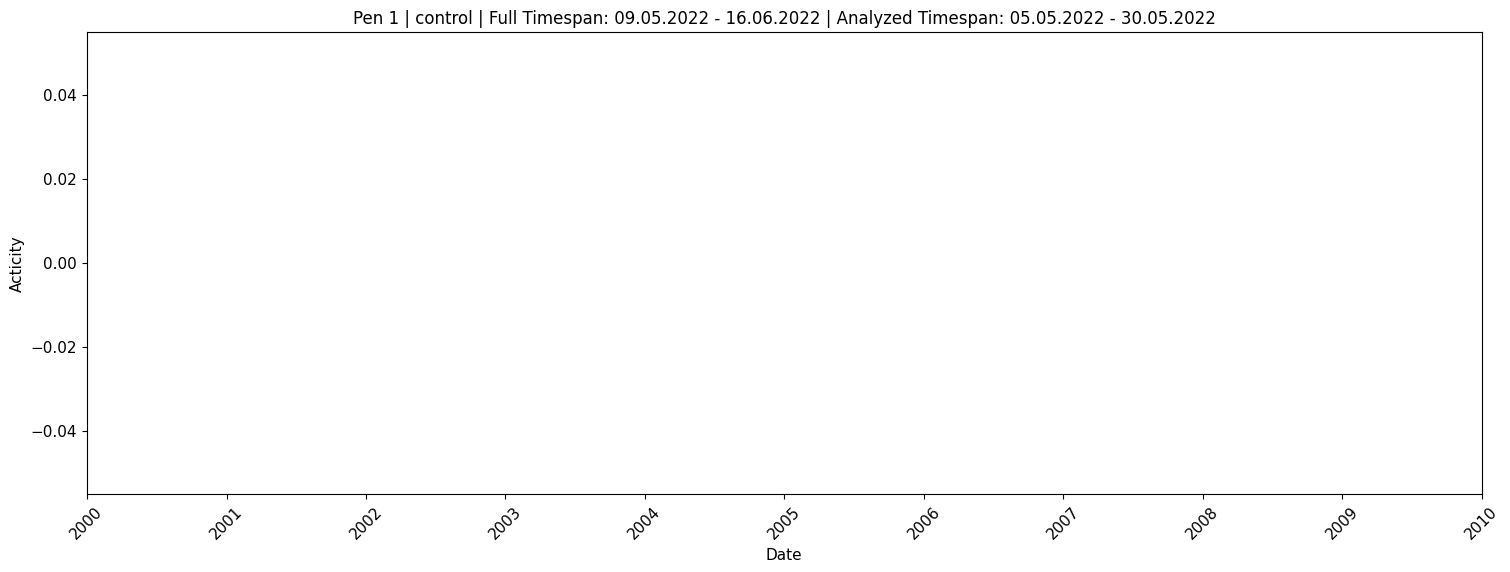

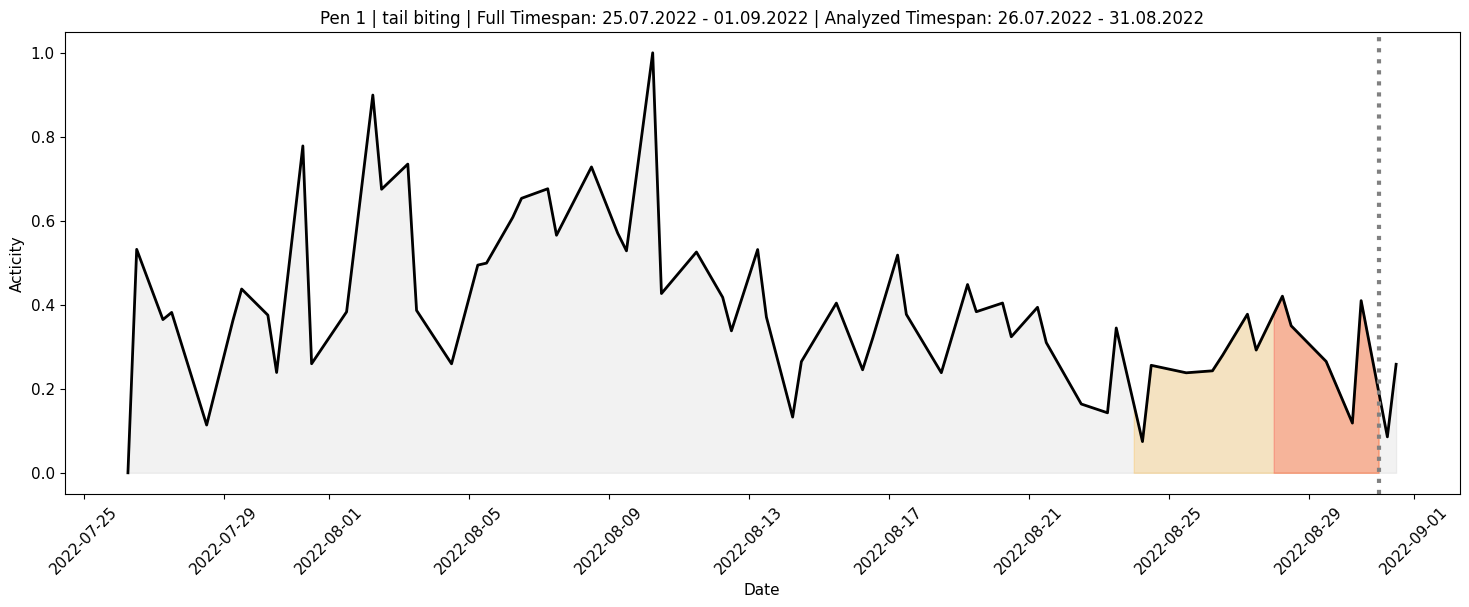

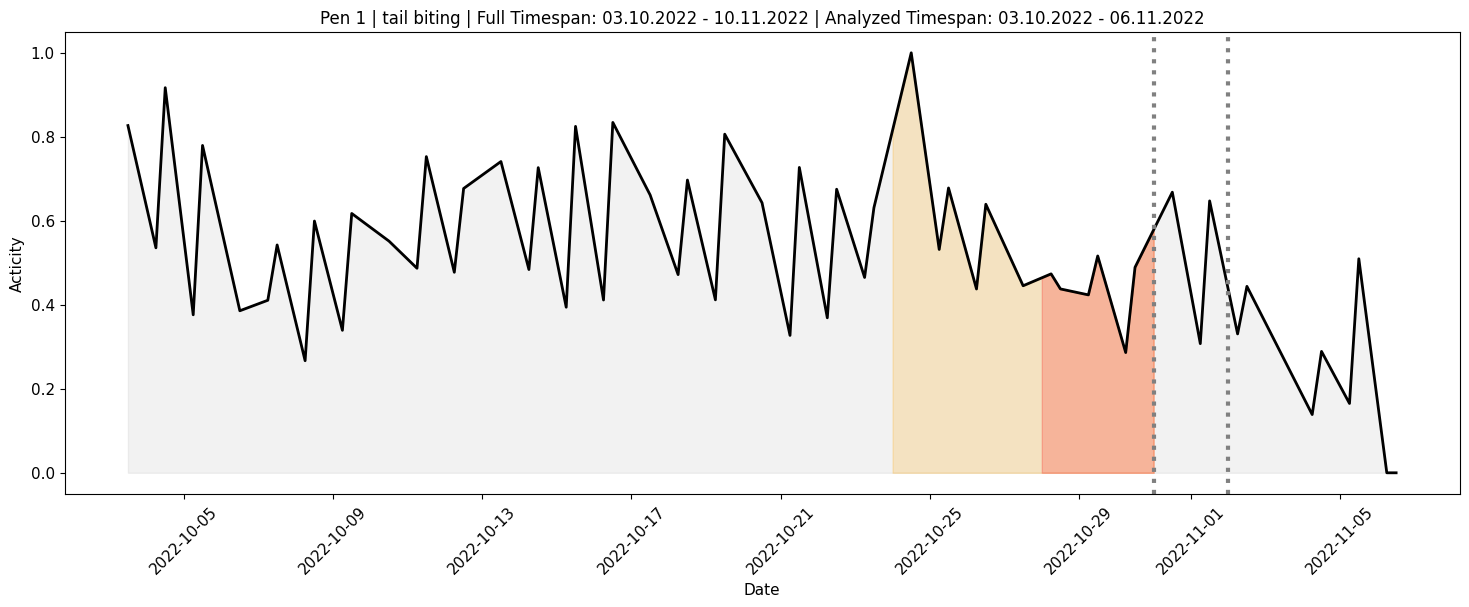

In [8]:
for el in pipeline_monitoring_results[:5]:
    analyze_activity_changes(el, path_to_piglet_rearing_info,
                                    resample_freq="6H", normalize=True, rolling_window=None)

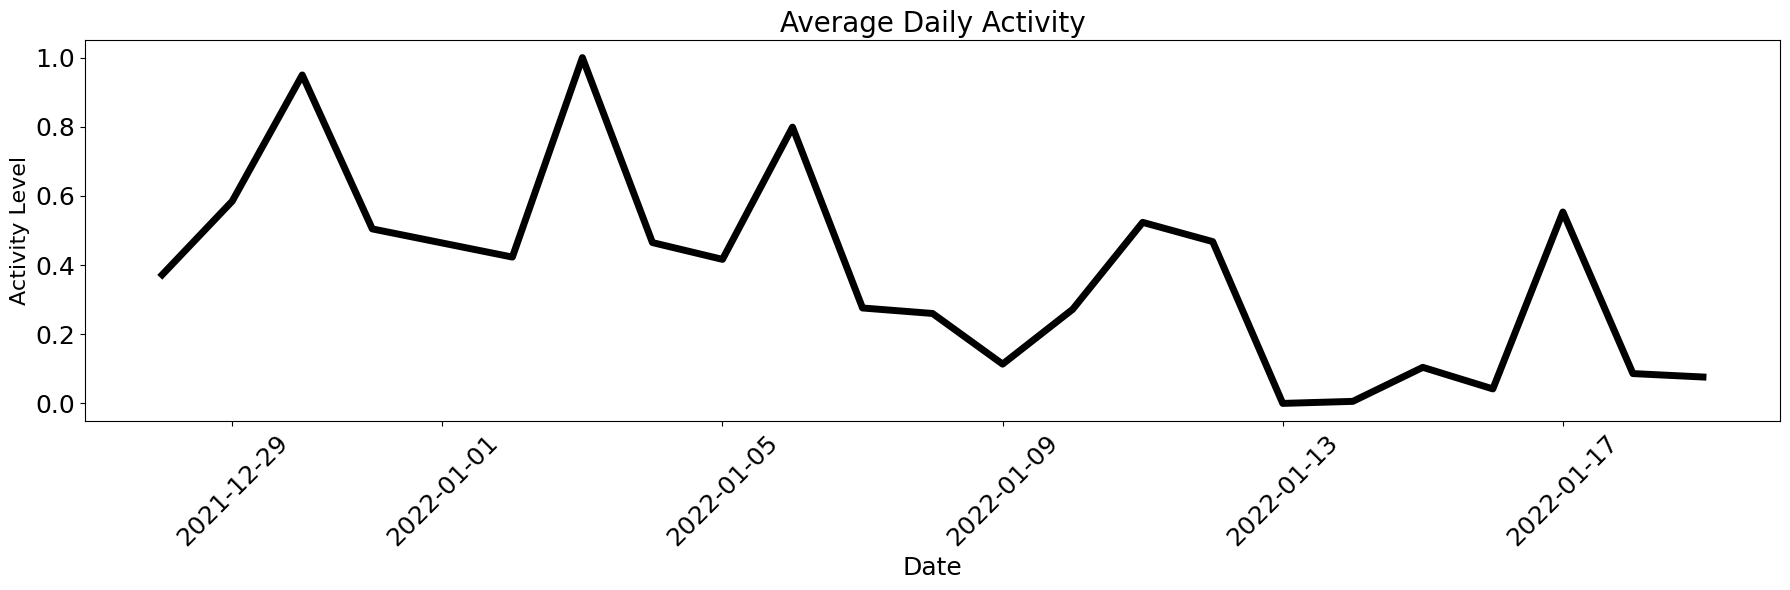

In [9]:
plot_average_activity(
            pipeline_monitoring_results[0]["dataframes"], resample_freqs=["D"], normalize=True, rolling_window=None, ewm_window=None, with_pig_posture=False)

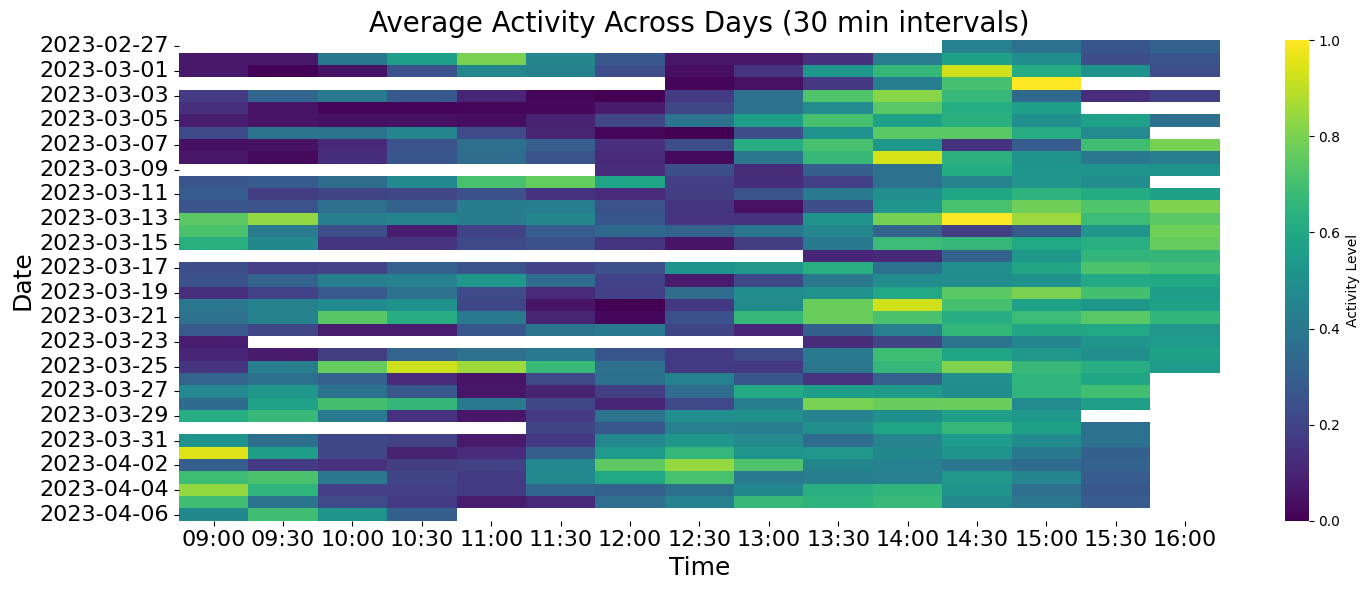

In [11]:
data = pipeline_monitoring_results[6]

heatmap_average_activity(
    data["dataframes"], resample_freq="30T", normalize=True, rolling_window=3)